# **Importing Libraries**

In [ ]:
import pandas as pd
from scipy.stats import pearsonr, kendalltau, spearmanr
from sklearn.metrics import mean_absolute_error
import numpy as np


In [ ]:
dataset = pd.read_csv('/content/hdac_06_bioactivity_data_3class_pIC50_pubchem_fp.csv')

In [ ]:
dataset

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,3.823909
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,3.000000
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.000000
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.552842
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2672,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.709965
2673,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.085657
2674,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.554396
2675,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,3.000000


In [ ]:
dataset = dataset.iloc[:,1:]
dataset

,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,PubchemFP10,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,3.823909
1,1,1,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,3.000000
2,1,1,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,4.000000
3,1,1,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,6.552842
4,1,1,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,4.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2672,1,1,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,5.709965
2673,1,1,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,5.085657
2674,1,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,5.554396
2675,1,1,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,3.000000


# Creating X and Y for Model Training

In [ ]:
X = dataset.drop(['pIC50'], axis = 1)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2672,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2673,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2674,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2675,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
Y = dataset.iloc[:,-1]
Y

,pIC50
0,3.823909
1,3.000000
2,4.000000
3,6.552842
4,4.000000
...,...
2672,5.709965
2673,5.085657
2674,5.554396
2675,3.000000


# Removing Low Variance PubChem Fingerprints

In [ ]:
from sklearn.feature_selection import VarianceThreshold


In [ ]:
from sklearn.feature_selection import VarianceThreshold

def remove_low_variance(input_data,threshold=0.1):
  selection = VarianceThreshold(threshold)
  selection.fit(input_data)
  return input_data[input_data.columns[selection.get_support(indices=True)]]

X = remove_low_variance(X,threshold=0.1)
X

,PubchemFP3,PubchemFP12,PubchemFP16,PubchemFP20,PubchemFP23,PubchemFP33,PubchemFP37,PubchemFP143,PubchemFP145,PubchemFP146,...,PubchemFP735,PubchemFP737,PubchemFP758,PubchemFP776,PubchemFP777,PubchemFP779,PubchemFP797,PubchemFP798,PubchemFP800,PubchemFP821
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2672,0,1,0,1,0,0,0,0,0,0,...,1,0,1,0,0,0,0,1,0,1
2673,0,1,0,0,0,0,0,0,0,0,...,1,0,1,1,0,0,1,1,0,1
2674,0,1,0,0,1,0,1,0,0,0,...,1,0,1,0,0,0,1,1,0,1
2675,0,1,1,1,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,1


In [ ]:
X.to_csv('pubchemtxt.csv', index = False)

# Testing RMSE and Rsquared value for 100 different types of splits

In [ ]:
from sklearn.model_selection import train_test_split, RepeatedKFold, cross_val_score
from sklearn.ensemble import RandomForestRegressor
import numpy as np

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

#Repeated Kfolds
n_splits = 5
n_repeats = 20
random_state=42

rkf = RepeatedKFold(n_splits=5, n_repeats=20, random_state=42)

model = RandomForestRegressor(n_estimators=500, random_state=42)
scores = cross_val_score(model, X_train, Y_train, scoring='r2', cv = rkf)


#calculating mean and standard deviation of R^2
mean_score = np.mean(scores)
std_dev = np.std(scores)

print(f"Mean R²: {mean_score:.3f}, Standard Deviation: {std_dev:.3f}")

Mean R²: 0.518, Standard Deviation: 0.043


# Training Random Regressor Model

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [ ]:
model = RandomForestRegressor(n_estimators=500, random_state = 42)
model.fit(X,Y)

r2 = model.score(X,Y)
r2

0.892273787903507

**r2 is given above of the Random Forest Regressor Model**

# Model Prediction

In [ ]:
Y_Pred = model.predict(X)
Y_Pred

array([3.76597506, 3.3837485 , 4.34553401, ..., 5.70136772, 4.25779966,
       6.70910027])

# Checking Different Metrics of the Model to add in the Paper

In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Training the model
model = RandomForestRegressor(n_estimators=500, random_state=42)
model.fit(X_train, Y_train)

# Predictions for Training and Test Sets
Y_train_pred = model.predict(X_train)
Y_test_pred = model.predict(X_test)

# Function to calculate all metrics, including RRSE
def calculate_metrics(y_true, y_pred):
    # Pearson Correlation Coefficient
    pearson_corr, _ = pearsonr(y_true, y_pred)

    # Kendall's Tau
    kendall_tau, _ = kendalltau(y_true, y_pred)

    # Spearman's Rho
    spearman_rho, _ = spearmanr(y_true, y_pred)

    # Mean Absolute Error (MAE)
    mae = mean_absolute_error(y_true, y_pred)

    # Root Mean Squared Error (RMSE)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))

    # Relative Absolute Error (RAE)
    rae = np.sum(np.abs(y_true - y_pred)) / np.sum(np.abs(y_true - np.mean(y_true)))

    # Root Relative Squared Error (RRSE)
    rss = np.sum((y_true - y_pred) ** 2)
    tss = np.sum((y_true - np.mean(y_true)) ** 2)
    rrse = np.sqrt(rss / tss)

    return pearson_corr, kendall_tau, spearman_rho, mae, rmse, rae, rrse

# Number of Instances
num_instances = dataset.shape[0]
print(f"Total Number of Instances in the Dataset: {num_instances}")

# Calculate metrics for Training Data
train_metrics = calculate_metrics(Y_train, Y_train_pred)
print("\nTraining Metrics:")
print(f"Pearson Correlation Coefficient: {train_metrics[0]:.3f}")
print(f"Kendall's Tau: {train_metrics[1]:.3f}")
print(f"Spearman's Rho: {train_metrics[2]:.3f}")
print(f"Mean Absolute Error (MAE): {train_metrics[3]:.3f}")
print(f"Root Mean Squared Error (RMSE): {train_metrics[4]:.3f}")
print(f"Relative Absolute Error (RAE): {train_metrics[5]:.3f}")
print(f"Root Relative Squared Error (RRSE): {train_metrics[6]:.3f}")

# Calculate metrics for Testing Data
test_metrics = calculate_metrics(Y_test, Y_test_pred)
print("\nTest Metrics:")
print(f"Pearson Correlation Coefficient: {test_metrics[0]:.3f}")
print(f"Kendall's Tau: {test_metrics[1]:.3f}")
print(f"Spearman's Rho: {test_metrics[2]:.3f}")
print(f"Mean Absolute Error (MAE): {test_metrics[3]:.3f}")
print(f"Root Mean Squared Error (RMSE): {test_metrics[4]:.3f}")
print(f"Relative Absolute Error (RAE): {test_metrics[5]:.3f}")
print(f"Root Relative Squared Error (RRSE): {test_metrics[6]:.3f}")


Total Number of Instances in the Dataset: 2677

Training Metrics:
Pearson Correlation Coefficient: 0.950
Kendall's Tau: 0.829
Spearman's Rho: 0.949
Mean Absolute Error (MAE): 0.285
Root Mean Squared Error (RMSE): 0.426
Relative Absolute Error (RAE): 0.271
Root Relative Squared Error (RRSE): 0.326

Test Metrics:
Pearson Correlation Coefficient: 0.708
Kendall's Tau: 0.514
Spearman's Rho: 0.683
Mean Absolute Error (MAE): 0.657
Root Mean Squared Error (RMSE): 0.910
Relative Absolute Error (RAE): 0.643
Root Relative Squared Error (RRSE): 0.709


In [ ]:
# Total number of instances in Train and Test datasets
num_train_instances = X_train.shape[0]
num_test_instances = X_test.shape[0]

print(f"Total Number of Instances in Training Data: {num_train_instances}")
print(f"Total Number of Instances in Testing Data: {num_test_instances}")


Total Number of Instances in Training Data: 2141
Total Number of Instances in Testing Data: 536


Test with different ways to increase accuracy

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectKBest, mutual_info_regression
from sklearn.preprocessing import StandardScaler
from scipy.stats import pearsonr, kendalltau, spearmanr
import numpy as np

# Split the dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Feature Selection
selector = SelectKBest(score_func=mutual_info_regression, k=50)  # Select top 50 features
X_train_selected = selector.fit_transform(X_train, Y_train)
X_test_selected = selector.transform(X_test)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_selected)
X_test_scaled = scaler.transform(X_test_selected)

# Hyperparameter Tuning using GridSearchCV
param_grid = {
    'n_estimators': [100, 300, 500],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}
grid_search = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    verbose=2,
    n_jobs=-1
)
grid_search.fit(X_train_scaled, Y_train)

# Best model from GridSearch
best_model = grid_search.best_estimator_

# Predictions for Training and Test Sets
Y_train_pred = best_model.predict(X_train_scaled)
Y_test_pred = best_model.predict(X_test_scaled)

# Function to calculate all metrics, including RRSE
def calculate_metrics(y_true, y_pred):
    # Pearson Correlation Coefficient
    pearson_corr, _ = pearsonr(y_true, y_pred)

    # Kendall's Tau
    kendall_tau, _ = kendalltau(y_true, y_pred)

    # Spearman's Rho
    spearman_rho, _ = spearmanr(y_true, y_pred)

    # Mean Absolute Error (MAE)
    mae = mean_absolute_error(y_true, y_pred)

    # Root Mean Squared Error (RMSE)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))

    # Relative Absolute Error (RAE)
    rae = np.sum(np.abs(y_true - y_pred)) / np.sum(np.abs(y_true - np.mean(y_true)))

    # Root Relative Squared Error (RRSE)
    rss = np.sum((y_true - y_pred) ** 2)
    tss = np.sum((y_true - np.mean(y_true)) ** 2)
    rrse = np.sqrt(rss / tss)

    return pearson_corr, kendall_tau, spearman_rho, mae, rmse, rae, rrse

# Number of Instances
num_instances = X.shape[0]
print(f"Total Number of Instances in the Dataset: {num_instances}")

# Calculate metrics for Training Data
train_metrics = calculate_metrics(Y_train, Y_train_pred)
print("\nTraining Metrics:")
print(f"Pearson Correlation Coefficient: {train_metrics[0]:.3f}")
print(f"Kendall's Tau: {train_metrics[1]:.3f}")
print(f"Spearman's Rho: {train_metrics[2]:.3f}")
print(f"Mean Absolute Error (MAE): {train_metrics[3]:.3f}")
print(f"Root Mean Squared Error (RMSE): {train_metrics[4]:.3f}")
print(f"Relative Absolute Error (RAE): {train_metrics[5]:.3f}")
print(f"Root Relative Squared Error (RRSE): {train_metrics[6]:.3f}")

# Calculate metrics for Testing Data
test_metrics = calculate_metrics(Y_test, Y_test_pred)
print("\nTest Metrics:")
print(f"Pearson Correlation Coefficient: {test_metrics[0]:.3f}")
print(f"Kendall's Tau: {test_metrics[1]:.3f}")
print(f"Spearman's Rho: {test_metrics[2]:.3f}")
print(f"Mean Absolute Error (MAE): {test_metrics[3]:.3f}")
print(f"Root Mean Squared Error (RMSE): {test_metrics[4]:.3f}")
print(f"Relative Absolute Error (RAE): {test_metrics[5]:.3f}")
print(f"Root Relative Squared Error (RRSE): {test_metrics[6]:.3f}")

# Cross-validation scores to ensure consistent performance
cv_scores = cross_val_score(best_model, X_train_scaled, Y_train, cv=5, scoring='neg_mean_squared_error')
cv_rmse = np.sqrt(-cv_scores)
print(f"\nCross-validated RMSE: {np.mean(cv_rmse):.3f} ± {np.std(cv_rmse):.3f}")


Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Total Number of Instances in the Dataset: 2677

Training Metrics:
Pearson Correlation Coefficient: 0.655
Kendall's Tau: 0.469
Spearman's Rho: 0.636
Mean Absolute Error (MAE): 0.746
Root Mean Squared Error (RMSE): 0.989
Relative Absolute Error (RAE): 0.709
Root Relative Squared Error (RRSE): 0.758

Test Metrics:
Pearson Correlation Coefficient: 0.527
Kendall's Tau: 0.379
Spearman's Rho: 0.521
Mean Absolute Error (MAE): 0.821
Root Mean Squared Error (RMSE): 1.093
Relative Absolute Error (RAE): 0.804
Root Relative Squared Error (RRSE): 0.852

Cross-validated RMSE: 1.075 ± 0.043


# Model Performance

In [ ]:
print('Mean Squared Error (MSE): %.2f' % mean_squared_error(Y,Y_Pred))
print('Coefficient of Determination (R^2): %.2f' % r2_score(Y,Y_Pred))

Mean Squared Error (MSE): 0.55
Coefficient of Determination (R^2): 0.67


# **Above is very Important for writing in paper**

# Data Visualisation for Experimental vs Predicted pIC50 value for Training Data

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

Text(0.5, 0, 'Experimental pIC50')

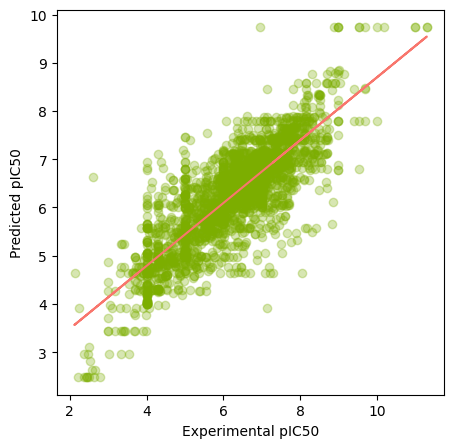

In [ ]:
plt.figure(figsize=(5,5))
plt.scatter(x=Y, y=Y_Pred, c="#7CAE00", alpha=0.3)

z = np.polyfit(Y, Y_Pred, 1)
p = np.poly1d(z)

plt.plot(Y,p(Y),"#F8766D")
plt.ylabel('Predicted pIC50')
plt.xlabel('Experimental pIC50')

# Saving Model as Pickle File

In [ ]:
import pickle

In [ ]:
pickle.dump(model, open('substructure.pkl', 'wb'))

# Substructure pIC50 Fingerprint Model Training

In [ ]:
dataset = pd.read_csv('/content/substructure_pIC50.csv')

In [ ]:
dataset

,Unnamed: 0,SubFP1,SubFP2,SubFP3,SubFP4,SubFP5,SubFP6,SubFP7,SubFP8,SubFP9,...,SubFP299,SubFP300,SubFP301,SubFP302,SubFP303,SubFP304,SubFP305,SubFP306,SubFP307,pIC50
0,0,0,1,0,0,0,0,0,0,0,...,0,1,1,1,0,0,0,0,1,3.823909
1,1,0,1,0,0,0,0,0,0,0,...,0,1,1,1,0,0,0,0,1,3.000000
2,2,0,1,0,0,0,0,0,0,1,...,0,1,1,1,0,0,0,0,1,4.000000
3,3,0,1,0,0,0,0,0,0,0,...,0,1,1,1,0,0,0,0,1,6.552842
4,4,0,1,0,0,0,1,0,0,0,...,0,1,1,1,0,0,0,0,1,4.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2672,2672,0,0,0,0,0,0,0,0,0,...,0,1,1,1,0,0,0,0,1,5.709965
2673,2673,0,0,0,0,0,0,0,0,0,...,0,1,1,1,0,0,0,0,1,5.085657
2674,2674,0,0,0,0,0,0,0,0,1,...,0,1,1,1,0,0,0,0,1,5.554396
2675,2675,0,0,0,0,0,0,0,0,1,...,0,1,1,1,0,0,0,0,1,3.000000


In [ ]:
dataset = dataset.iloc[:,1:]
dataset

,SubFP1,SubFP2,SubFP3,SubFP4,SubFP5,SubFP6,SubFP7,SubFP8,SubFP9,SubFP10,...,SubFP299,SubFP300,SubFP301,SubFP302,SubFP303,SubFP304,SubFP305,SubFP306,SubFP307,pIC50
0,0,1,0,0,0,0,0,0,0,0,...,0,1,1,1,0,0,0,0,1,3.823909
1,0,1,0,0,0,0,0,0,0,0,...,0,1,1,1,0,0,0,0,1,3.000000
2,0,1,0,0,0,0,0,0,1,0,...,0,1,1,1,0,0,0,0,1,4.000000
3,0,1,0,0,0,0,0,0,0,0,...,0,1,1,1,0,0,0,0,1,6.552842
4,0,1,0,0,0,1,0,0,0,0,...,0,1,1,1,0,0,0,0,1,4.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2672,0,0,0,0,0,0,0,0,0,0,...,0,1,1,1,0,0,0,0,1,5.709965
2673,0,0,0,0,0,0,0,0,0,0,...,0,1,1,1,0,0,0,0,1,5.085657
2674,0,0,0,0,0,0,0,0,1,0,...,0,1,1,1,0,0,0,0,1,5.554396
2675,0,0,0,0,0,0,0,0,1,0,...,0,1,1,1,0,0,0,0,1,3.000000


# Creating X and Y for Model Training

In [ ]:
X = dataset.drop(['pIC50'], axis = 1)
X

,SubFP1,SubFP2,SubFP3,SubFP4,SubFP5,SubFP6,SubFP7,SubFP8,SubFP9,SubFP10,...,SubFP298,SubFP299,SubFP300,SubFP301,SubFP302,SubFP303,SubFP304,SubFP305,SubFP306,SubFP307
0,0,1,0,0,0,0,0,0,0,0,...,0,0,1,1,1,0,0,0,0,1
1,0,1,0,0,0,0,0,0,0,0,...,0,0,1,1,1,0,0,0,0,1
2,0,1,0,0,0,0,0,0,1,0,...,0,0,1,1,1,0,0,0,0,1
3,0,1,0,0,0,0,0,0,0,0,...,0,0,1,1,1,0,0,0,0,1
4,0,1,0,0,0,1,0,0,0,0,...,0,0,1,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2672,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,1,0,0,0,0,1
2673,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,1,0,0,0,0,1
2674,0,0,0,0,0,0,0,0,1,0,...,0,0,1,1,1,0,0,0,0,1
2675,0,0,0,0,0,0,0,0,1,0,...,0,0,1,1,1,0,0,0,0,1


In [ ]:
Y = dataset.iloc[:,-1]
Y

,pIC50
0,3.823909
1,3.000000
2,4.000000
3,6.552842
4,4.000000
...,...
2672,5.709965
2673,5.085657
2674,5.554396
2675,3.000000


# Removing Low Variance Fingerprints

In [ ]:
from sklearn.feature_selection import VarianceThreshold


In [ ]:
from sklearn.feature_selection import VarianceThreshold

def remove_low_variance(input_data,threshold=0.1):
  selection = VarianceThreshold(threshold)
  selection.fit(input_data)
  return input_data[input_data.columns[selection.get_support(indices=True)]]

X = remove_low_variance(X,threshold=0.1)
X

,SubFP1,SubFP2,SubFP3,SubFP5,SubFP18,SubFP23,SubFP49,SubFP96,SubFP100,SubFP135,SubFP137,SubFP143,SubFP171,SubFP179,SubFP180,SubFP181,SubFP184,SubFP275,SubFP287,SubFP303
0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2672,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,1,0
2673,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,1,0
2674,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,0,0,1,0
2675,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,0,0,1,0


In [ ]:
X.to_csv('substructuretxt.csv', index = False)

# Testing RMSE and Rsquared value for 100 different types of splits

In [ ]:
from sklearn.model_selection import train_test_split, RepeatedKFold, cross_val_score
from sklearn.ensemble import RandomForestRegressor
import numpy as np
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

#Repeated Kfolds
n_splits = 5
n_repeats = 20
random_state=42

rkf = RepeatedKFold(n_splits=5, n_repeats=20, random_state=42)

model = RandomForestRegressor(n_estimators=500, random_state=42)
scores = cross_val_score(model, X_train, Y_train, scoring='r2', cv = rkf)


#calculating mean and standard deviation of R^2
mean_score = np.mean(scores)
std_dev = np.std(scores)

print(f"Mean R²: {mean_score:.3f}, Standard Deviation: {std_dev:.3f}")

KeyboardInterrupt: 

# Testing Metrics to add in Paper

In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Training the model
model = RandomForestRegressor(n_estimators=500, random_state=42)
model.fit(X_train, Y_train)

# Predictions for Training and Test Sets
Y_train_pred = model.predict(X_train)
Y_test_pred = model.predict(X_test)

# Function to calculate all metrics, including RRSE
def calculate_metrics(y_true, y_pred):
    # Pearson Correlation Coefficient
    pearson_corr, _ = pearsonr(y_true, y_pred)

    # Kendall's Tau
    kendall_tau, _ = kendalltau(y_true, y_pred)

    # Spearman's Rho
    spearman_rho, _ = spearmanr(y_true, y_pred)

    # Mean Absolute Error (MAE)
    mae = mean_absolute_error(y_true, y_pred)

    # Root Mean Squared Error (RMSE)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))

    # Relative Absolute Error (RAE)
    rae = np.sum(np.abs(y_true - y_pred)) / np.sum(np.abs(y_true - np.mean(y_true)))

    # Root Relative Squared Error (RRSE)
    rss = np.sum((y_true - y_pred) ** 2)
    tss = np.sum((y_true - np.mean(y_true)) ** 2)
    rrse = np.sqrt(rss / tss)

    return pearson_corr, kendall_tau, spearman_rho, mae, rmse, rae, rrse

# Number of Instances
num_instances = dataset.shape[0]
print(f"Total Number of Instances in the Dataset: {num_instances}")

# Calculate metrics for Training Data
train_metrics = calculate_metrics(Y_train, Y_train_pred)
print("\nTraining Metrics:")
print(f"Pearson Correlation Coefficient: {train_metrics[0]:.3f}")
print(f"Kendall's Tau: {train_metrics[1]:.3f}")
print(f"Spearman's Rho: {train_metrics[2]:.3f}")
print(f"Mean Absolute Error (MAE): {train_metrics[3]:.3f}")
print(f"Root Mean Squared Error (RMSE): {train_metrics[4]:.3f}")
print(f"Relative Absolute Error (RAE): {train_metrics[5]:.3f}")
print(f"Root Relative Squared Error (RRSE): {train_metrics[6]:.3f}")

# Calculate metrics for Testing Data
test_metrics = calculate_metrics(Y_test, Y_test_pred)
print("\nTest Metrics:")
print(f"Pearson Correlation Coefficient: {test_metrics[0]:.3f}")
print(f"Kendall's Tau: {test_metrics[1]:.3f}")
print(f"Spearman's Rho: {test_metrics[2]:.3f}")
print(f"Mean Absolute Error (MAE): {test_metrics[3]:.3f}")
print(f"Root Mean Squared Error (RMSE): {test_metrics[4]:.3f}")
print(f"Relative Absolute Error (RAE): {test_metrics[5]:.3f}")
print(f"Root Relative Squared Error (RRSE): {test_metrics[6]:.3f}")


Total Number of Instances in the Dataset: 2677

Training Metrics:
Pearson Correlation Coefficient: 0.822
Kendall's Tau: 0.621
Spearman's Rho: 0.796
Mean Absolute Error (MAE): 0.538
Root Mean Squared Error (RMSE): 0.744
Relative Absolute Error (RAE): 0.512
Root Relative Squared Error (RRSE): 0.570

Test Metrics:
Pearson Correlation Coefficient: 0.705
Kendall's Tau: 0.494
Spearman's Rho: 0.671
Mean Absolute Error (MAE): 0.696
Root Mean Squared Error (RMSE): 0.917
Relative Absolute Error (RAE): 0.681
Root Relative Squared Error (RRSE): 0.715


In [ ]:
model = RandomForestRegressor(n_estimators=500, random_state = 42)
model.fit(X,Y)

r2 = model.score(X,Y)
r2

0.5901556632699168

In [ ]:
Y_Pred = model.predict(X)
Y_Pred

array([4.23842559, 4.23842559, 5.99221386, ..., 6.01717234, 6.01799512,
       5.99221386])

In [ ]:
print('Mean Squared Error (MSE): %.2f' % mean_squared_error(Y,Y_Pred))
print('Coefficient of Determination (R^2): %.2f' % r2_score(Y,Y_Pred))

Mean Squared Error (MSE): 0.55
Coefficient of Determination (R^2): 0.67


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

Text(0.5, 0, 'Experimental pIC50')

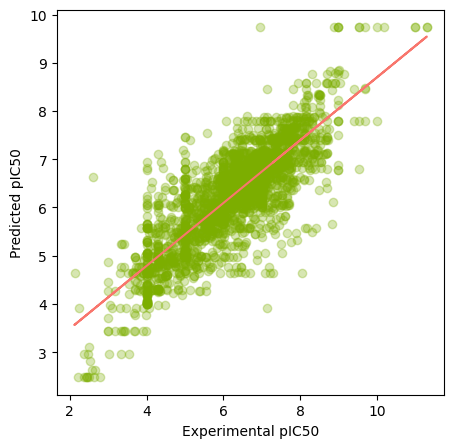

In [ ]:
plt.figure(figsize=(5,5))
plt.scatter(x=Y, y=Y_Pred, c="#7CAE00", alpha=0.3)

z = np.polyfit(Y, Y_Pred, 1)
p = np.poly1d(z)

plt.plot(Y,p(Y),"#F8766D")
plt.ylabel('Predicted pIC50')
plt.xlabel('Experimental pIC50')

In [ ]:
import pickle

In [ ]:
pickle.dump(model, open('substructure.pkl', 'wb'))

# 1D and 2d Descriptor

# ***Same for 1D and 2D descriptors***

In [ ]:
dataset2 = pd.read_csv('/content/descriptor_list_2D.csv')
dataset2

,molecule_chembl_id,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,nH,...,AMW,WTPT-1,WTPT-3,WTPT-4,WTPT-5,WPATH,WPOL,XLogP,Zagreb,pIC50
0,CHEMBL112539,-2.3876,5.700634,37.7528,39.126274,6,6,36,18,18,...,6.948416,35.353630,16.023305,4.982775,11.040530,798,19,0.941,78,3.823909
1,CHEMBL136792,-2.6756,7.158835,40.6644,42.219860,6,6,39,19,20,...,6.773298,37.353599,16.024855,4.983402,11.041453,954,20,1.299,82,3.000000
2,CHEMBL137003,-2.8123,7.909031,38.1924,42.581860,6,6,39,19,20,...,6.773010,37.353599,13.096815,7.381503,5.715312,954,20,2.829,82,4.000000
3,CHEMBL98,-1.2771,1.630984,42.2254,44.544067,6,6,41,22,19,...,7.710728,42.955757,18.004149,4.998051,5.969570,1457,25,3.925,100,6.552842
4,CHEMBL264784,-0.1742,0.030346,56.2001,52.445032,6,6,46,22,24,...,6.438888,43.372421,8.894342,2.533099,6.361243,1441,24,4.115,94,4.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2672,CHEMBL4582566,-2.5316,6.408999,28.9855,56.137067,18,18,47,28,19,...,8.024203,56.615328,19.048398,10.718270,8.330128,2428,42,3.506,142,5.709965
2673,CHEMBL4564037,-2.0713,4.290284,26.4209,63.708653,22,23,52,31,21,...,7.906890,63.609441,16.551788,8.211423,8.340365,3236,49,6.978,162,5.085657
2674,CHEMBL4457709,-0.3312,0.109693,32.7744,56.518895,18,18,46,31,15,...,9.762509,62.093654,25.840891,8.130824,8.034485,3188,49,5.161,162,5.554396
2675,CHEMBL4457019,-0.1266,0.016028,44.1678,62.706067,18,18,52,33,19,...,9.175129,65.927535,26.491177,8.215915,8.599678,3794,53,5.821,172,3.000000


In [ ]:
X = dataset2.drop(['pIC50', 'molecule_chembl_id'], axis = 1)
X

,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,nH,nC,...,MW,AMW,WTPT-1,WTPT-3,WTPT-4,WTPT-5,WPATH,WPOL,XLogP,Zagreb
0,-2.3876,5.700634,37.7528,39.126274,6,6,36,18,18,12,...,250.142976,6.948416,35.353630,16.023305,4.982775,11.040530,798,19,0.941,78
1,-2.6756,7.158835,40.6644,42.219860,6,6,39,19,20,13,...,264.158626,6.773298,37.353599,16.024855,4.983402,11.041453,954,20,1.299,82
2,-2.8123,7.909031,38.1924,42.581860,6,6,39,19,20,14,...,264.147393,6.773010,37.353599,13.096815,7.381503,5.715312,954,20,2.829,82
3,-1.2771,1.630984,42.2254,44.544067,6,6,41,22,19,15,...,316.139862,7.710728,42.955757,18.004149,4.998051,5.969570,1457,25,3.925,100
4,-0.1742,0.030346,56.2001,52.445032,6,6,46,22,24,19,...,296.188863,6.438888,43.372421,8.894342,2.533099,6.361243,1441,24,4.115,94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2672,-2.5316,6.408999,28.9855,56.137067,18,18,47,28,19,21,...,377.137556,8.024203,56.615328,19.048398,10.718270,8.330128,2428,42,3.506,142
2673,-2.0713,4.290284,26.4209,63.708653,22,23,52,31,21,25,...,411.158292,7.906890,63.609441,16.551788,8.211423,8.340365,3236,49,6.978,162
2674,-0.3312,0.109693,32.7744,56.518895,18,18,46,31,15,21,...,449.075404,9.762509,62.093654,25.840891,8.130824,8.034485,3188,49,5.161,162
2675,-0.1266,0.016028,44.1678,62.706067,18,18,52,33,19,23,...,477.106704,9.175129,65.927535,26.491177,8.215915,8.599678,3794,53,5.821,172


In [ ]:
from sklearn.feature_selection import VarianceThreshold

def remove_low_variance(input_data,threshold=0.1):
  selection = VarianceThreshold(threshold)
  selection.fit(input_data)
  return input_data[input_data.columns[selection.get_support(indices=True)]]

X = remove_low_variance(X,threshold=0.1)
X

,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,nH,nC,...,MW,AMW,WTPT-1,WTPT-3,WTPT-4,WTPT-5,WPATH,WPOL,XLogP,Zagreb
0,-2.3876,5.700634,37.7528,39.126274,6,6,36,18,18,12,...,250.142976,6.948416,35.353630,16.023305,4.982775,11.040530,798,19,0.941,78
1,-2.6756,7.158835,40.6644,42.219860,6,6,39,19,20,13,...,264.158626,6.773298,37.353599,16.024855,4.983402,11.041453,954,20,1.299,82
2,-2.8123,7.909031,38.1924,42.581860,6,6,39,19,20,14,...,264.147393,6.773010,37.353599,13.096815,7.381503,5.715312,954,20,2.829,82
3,-1.2771,1.630984,42.2254,44.544067,6,6,41,22,19,15,...,316.139862,7.710728,42.955757,18.004149,4.998051,5.969570,1457,25,3.925,100
4,-0.1742,0.030346,56.2001,52.445032,6,6,46,22,24,19,...,296.188863,6.438888,43.372421,8.894342,2.533099,6.361243,1441,24,4.115,94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2672,-2.5316,6.408999,28.9855,56.137067,18,18,47,28,19,21,...,377.137556,8.024203,56.615328,19.048398,10.718270,8.330128,2428,42,3.506,142
2673,-2.0713,4.290284,26.4209,63.708653,22,23,52,31,21,25,...,411.158292,7.906890,63.609441,16.551788,8.211423,8.340365,3236,49,6.978,162
2674,-0.3312,0.109693,32.7744,56.518895,18,18,46,31,15,21,...,449.075404,9.762509,62.093654,25.840891,8.130824,8.034485,3188,49,5.161,162
2675,-0.1266,0.016028,44.1678,62.706067,18,18,52,33,19,23,...,477.106704,9.175129,65.927535,26.491177,8.215915,8.599678,3794,53,5.821,172


In [ ]:
X.to_csv('descriptorstxt.csv', index = False)

In [ ]:
Y = dataset2.iloc[:,-1]
Y

,pIC50
0,3.823909
1,3.000000
2,4.000000
3,6.552842
4,4.000000
...,...
2672,5.709965
2673,5.085657
2674,5.554396
2675,3.000000


# Testing R squared for 100 different Independent Data splits

In [ ]:
from sklearn.model_selection import train_test_split, RepeatedKFold, cross_val_score
from sklearn.ensemble import RandomForestRegressor
import numpy as np
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

#Repeated Kfolds
n_splits = 5
n_repeats = 20
random_state=42

rkf = RepeatedKFold(n_splits=5, n_repeats=20, random_state=42)

model = RandomForestRegressor(n_estimators=500, random_state=42)
scores = cross_val_score(model, X_train, Y_train, scoring='r2', cv = rkf)


#calculating mean and standard deviation of R^2
mean_score = np.mean(scores)
std_dev = np.std(scores)

print(f"Mean R²: {mean_score:.3f}, Standard Deviation: {std_dev:.3f}")

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Adding Metrics of the 2D Descriptors for the paper

In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Training the model
model = RandomForestRegressor(n_estimators=500, random_state=42)
model.fit(X_train, Y_train)

# Predictions for Training and Test Sets
Y_train_pred = model.predict(X_train)
Y_test_pred = model.predict(X_test)

# Function to calculate all metrics, including RRSE
def calculate_metrics(y_true, y_pred):
    # Pearson Correlation Coefficient
    pearson_corr, _ = pearsonr(y_true, y_pred)

    # Kendall's Tau
    kendall_tau, _ = kendalltau(y_true, y_pred)

    # Spearman's Rho
    spearman_rho, _ = spearmanr(y_true, y_pred)

    # Mean Absolute Error (MAE)
    mae = mean_absolute_error(y_true, y_pred)

    # Root Mean Squared Error (RMSE)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))

    # Relative Absolute Error (RAE)
    rae = np.sum(np.abs(y_true - y_pred)) / np.sum(np.abs(y_true - np.mean(y_true)))

    # Root Relative Squared Error (RRSE)
    rss = np.sum((y_true - y_pred) ** 2)
    tss = np.sum((y_true - np.mean(y_true)) ** 2)
    rrse = np.sqrt(rss / tss)

    return pearson_corr, kendall_tau, spearman_rho, mae, rmse, rae, rrse

# Number of Instances
num_instances = dataset.shape[0]
print(f"Total Number of Instances in the Dataset: {num_instances}")

# Calculate metrics for Training Data
train_metrics = calculate_metrics(Y_train, Y_train_pred)
print("\nTraining Metrics:")
print(f"Pearson Correlation Coefficient: {train_metrics[0]:.3f}")
print(f"Kendall's Tau: {train_metrics[1]:.3f}")
print(f"Spearman's Rho: {train_metrics[2]:.3f}")
print(f"Mean Absolute Error (MAE): {train_metrics[3]:.3f}")
print(f"Root Mean Squared Error (RMSE): {train_metrics[4]:.3f}")
print(f"Relative Absolute Error (RAE): {train_metrics[5]:.3f}")
print(f"Root Relative Squared Error (RRSE): {train_metrics[6]:.3f}")

# Calculate metrics for Testing Data
test_metrics = calculate_metrics(Y_test, Y_test_pred)
print("\nTest Metrics:")
print(f"Pearson Correlation Coefficient: {test_metrics[0]:.3f}")
print(f"Kendall's Tau: {test_metrics[1]:.3f}")
print(f"Spearman's Rho: {test_metrics[2]:.3f}")
print(f"Mean Absolute Error (MAE): {test_metrics[3]:.3f}")
print(f"Root Mean Squared Error (RMSE): {test_metrics[4]:.3f}")
print(f"Relative Absolute Error (RAE): {test_metrics[5]:.3f}")
print(f"Root Relative Squared Error (RRSE): {test_metrics[6]:.3f}")


Total Number of Instances in the Dataset: 2677

Training Metrics:
Pearson Correlation Coefficient: 0.979
Kendall's Tau: 0.881
Spearman's Rho: 0.977
Mean Absolute Error (MAE): 0.235
Root Mean Squared Error (RMSE): 0.321
Relative Absolute Error (RAE): 0.224
Root Relative Squared Error (RRSE): 0.246

Test Metrics:
Pearson Correlation Coefficient: 0.758
Kendall's Tau: 0.564
Spearman's Rho: 0.739
Mean Absolute Error (MAE): 0.622
Root Mean Squared Error (RMSE): 0.841
Relative Absolute Error (RAE): 0.609
Root Relative Squared Error (RRSE): 0.655


In [ ]:
model = RandomForestRegressor(n_estimators=500, random_state = 42)
model.fit(X,Y)

r2 = model.score(X,Y)
r2

KeyboardInterrupt: 

In [ ]:
Y_Pred = model.predict(X)
Y_Pred

In [ ]:
print('Mean Squared Error (MSE): %.2f' % mean_squared_error(Y,Y_Pred))
print('Coefficient of Determination (R^2): %.2f' % r2_score(Y,Y_Pred))

Text(0.5, 0, 'Experimental pIC50')

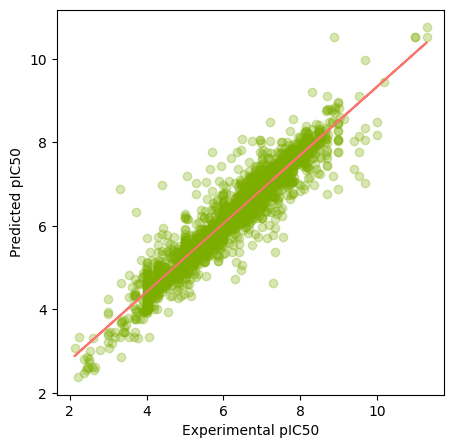

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(5,5))
plt.scatter(x=Y, y=Y_Pred, c="#7CAE00", alpha=0.3)

z = np.polyfit(Y, Y_Pred, 1)
p = np.poly1d(z)

plt.plot(Y,p(Y),"#F8766D")
plt.ylabel('Predicted pIC50')
plt.xlabel('Experimental pIC50')

In [ ]:
import pickle
pickle.dump(model, open('descriptors.pkl', 'wb'))